In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading the dataset
data = pd.read_csv('C:/Users/shaje/OneDrive/Documents/NCL Internship/6_2023_113.csv')

In [3]:
data.head()

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,6498473,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:34,0.0,0.0
1,6498472,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:32,0.0,0.0
2,6498471,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:28,0.0,0.0
3,6498470,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:26,0.0,0.0
4,6498469,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-18 15:43:24,0.0,0.0


In [4]:
data.shape

(35118, 41)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35118 entries, 0 to 35117
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   bulk_id                               35118 non-null  int64  
 1   car_reg_no                            35118 non-null  int64  
 2   vehicle_speed                         35118 non-null  float64
 3   heading                               35118 non-null  float64
 4   distance                              0 non-null      float64
 5   altitude                              35118 non-null  float64
 6   o_s1_b1_voltage                       0 non-null      float64
 7   o_s2_b2_voltage                       33877 non-null  float64
 8   o_s1_current                          33872 non-null  float64
 9   calculated_engine_load                33873 non-null  float64
 10  engine_rpm                            33863 non-null  float64
 11  spark_advance  

In [6]:
data.isnull().sum()

bulk_id                                     0
car_reg_no                                  0
vehicle_speed                               0
heading                                     0
distance                                35118
altitude                                    0
o_s1_b1_voltage                         35118
o_s2_b2_voltage                          1241
o_s1_current                             1246
calculated_engine_load                   1245
engine_rpm                               1255
spark_advance                            1261
absolute_load_value                      1272
throttle_position                        1272
relative_throttle_position               1273
absolute_throttle_position               1281
ap_pos_d                                 1308
ap_pos_e                                 1322
commanded_exhaust_gas_recirculation     35118
commanded_evaporative_purge              1331
commanded_throttle_actuator             35118
fuel_rail_pressure                

In [7]:
# Drop irrelevant columns and handle missing values
data.drop(columns=['bulk_id', 'car_reg_no', 'time_stamp', 'latitude', 'longitude'], inplace=True)

In [10]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       vehicle_speed       heading  distance      altitude  o_s1_b1_voltage  \
count   35118.000000  35118.000000       0.0  35118.000000              0.0   
mean       22.405746      7.751308       NaN     -0.997315              NaN   
std        17.829335     34.872468       NaN      5.330101              NaN   
min         0.000000      0.000000       NaN    -27.100000              NaN   
25%         6.000000      0.000000       NaN      0.000000              NaN   
50%        20.000000      0.000000       NaN      0.000000              NaN   
75%        36.000000      0.000000       NaN      0.000000              NaN   
max        87.000000    284.306732       NaN      7.900000              NaN   

       o_s2_b2_voltage  o_s1_current  calculated_engine_load    engine_rpm  \
count     33877.000000       33872.0            33873.000000  33863.000000   
mean          0.493836           0.0               62.576985   1235.767622   
std           0.333907           

In [11]:
# Handle missing values
data.fillna(data.mean(), inplace=True)

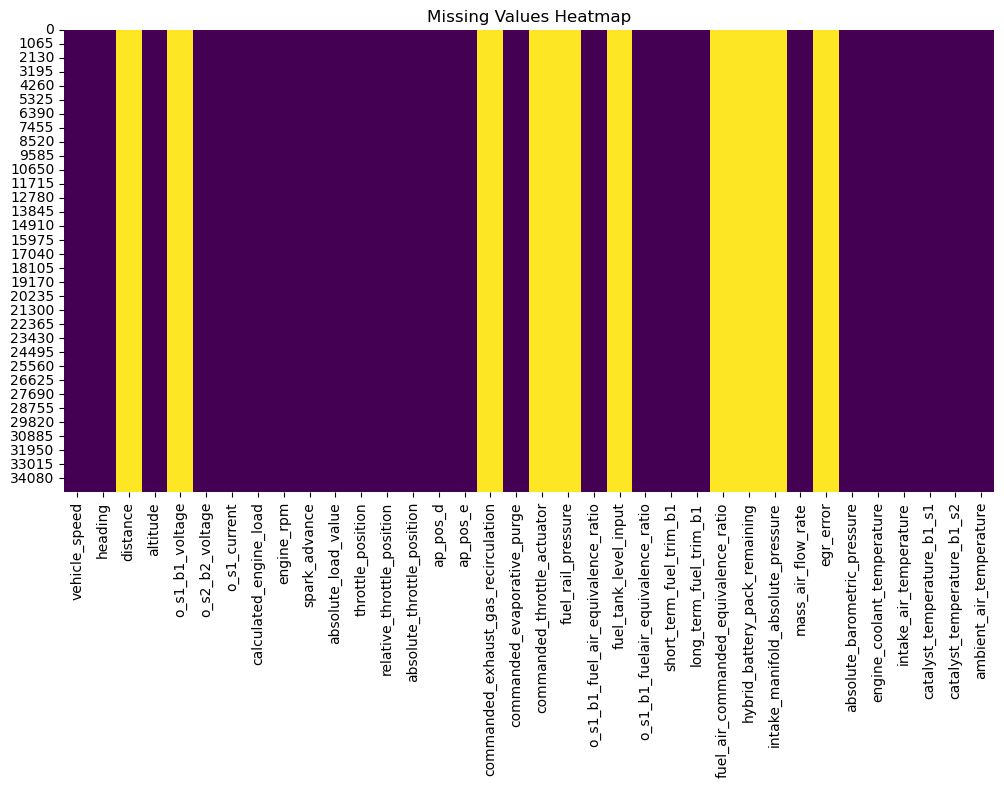

In [12]:
# Plot missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

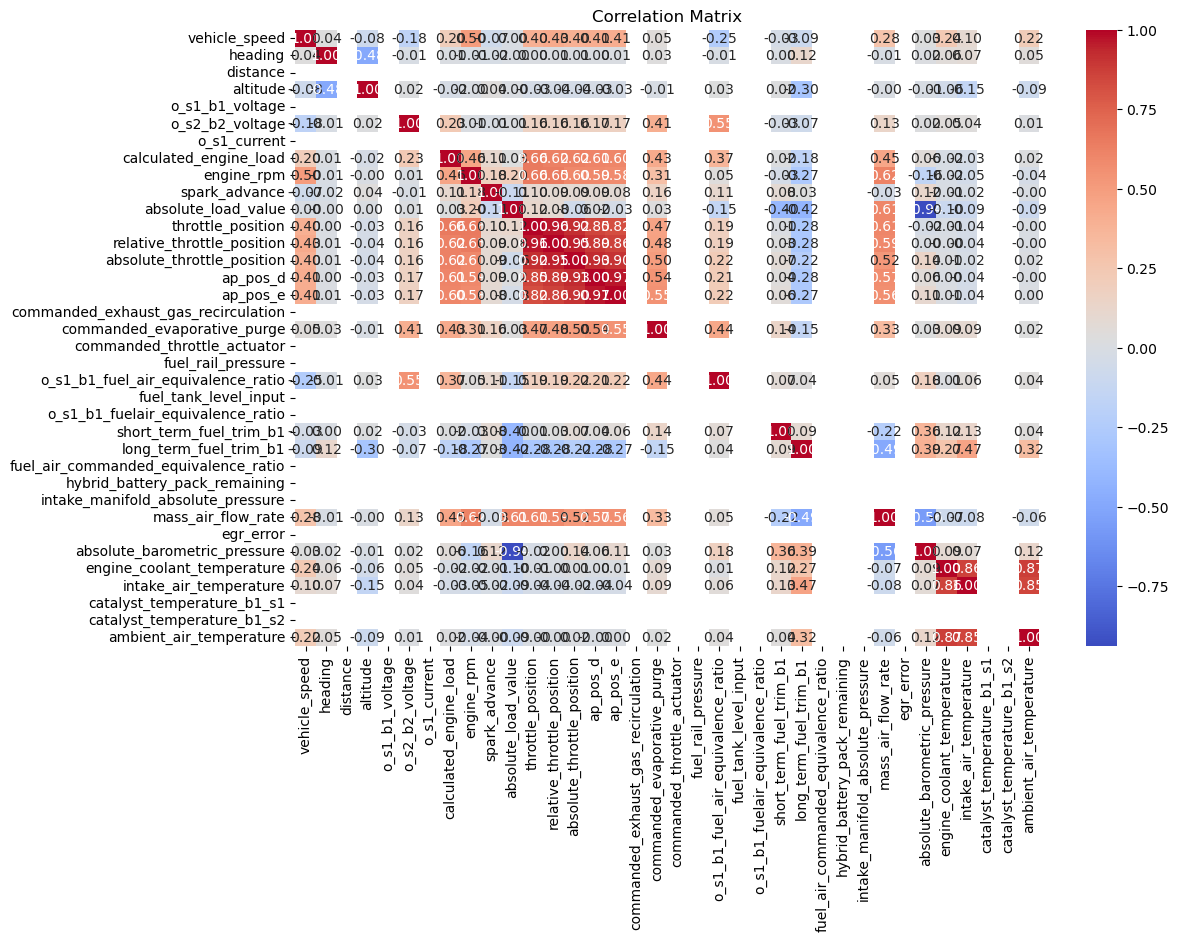

In [13]:
# Correlation matrix
df_corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

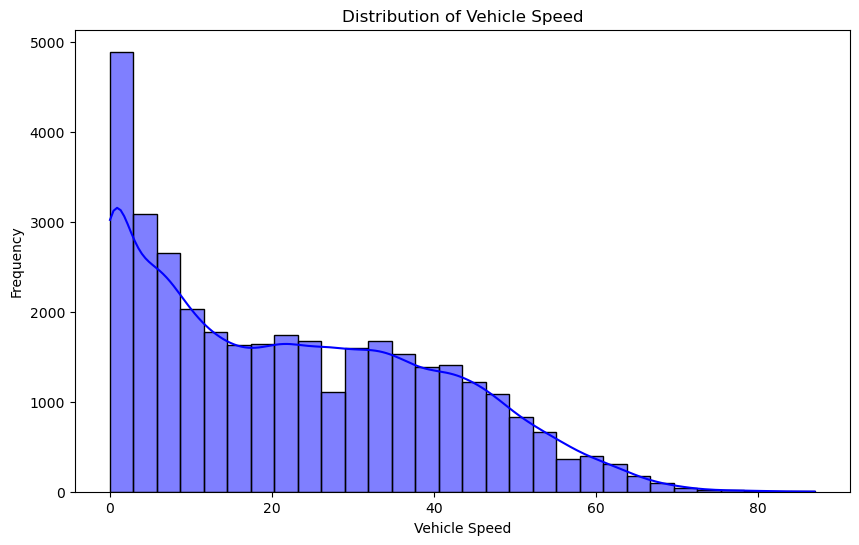

In [14]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(data['vehicle_speed'], kde=True, bins=30, color="blue")
plt.title("Distribution of Vehicle Speed")
plt.xlabel("Vehicle Speed")
plt.ylabel("Frequency")
plt.show()

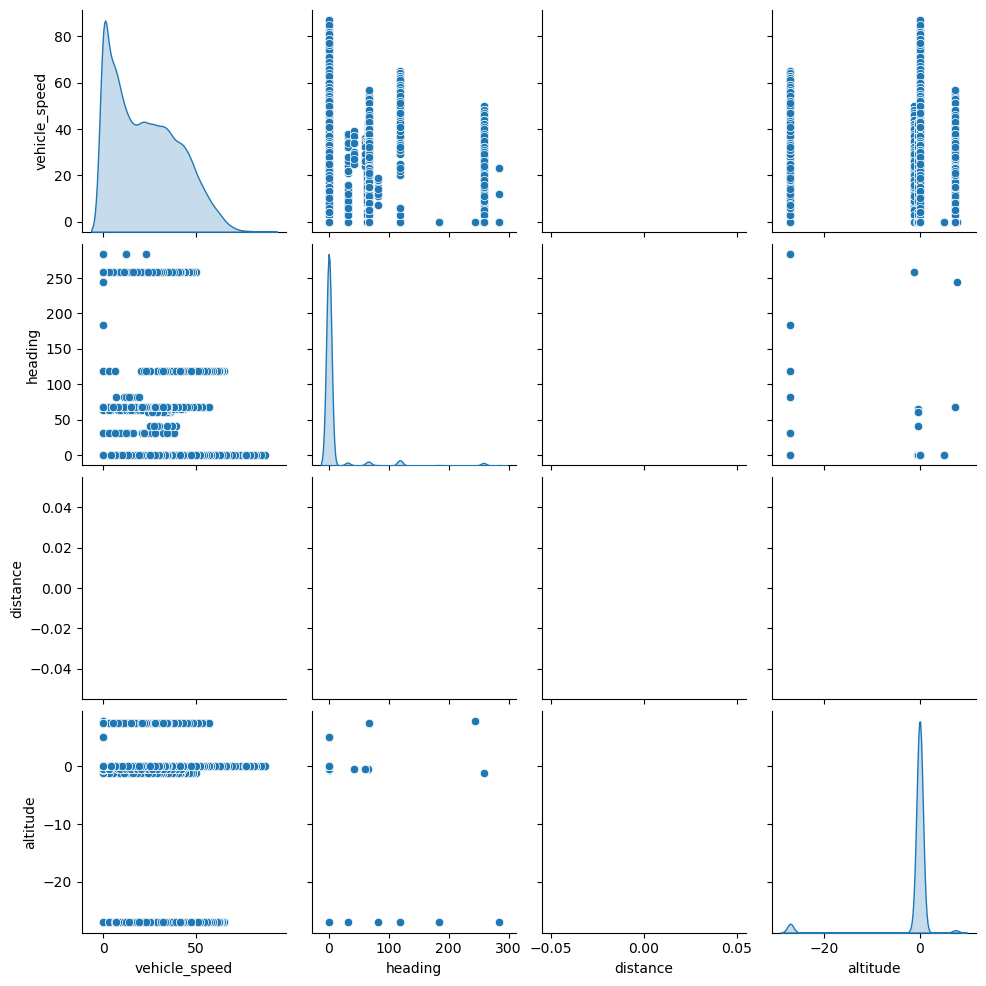

In [15]:
# Pairplot of selected features
selected_features = ["vehicle_speed", "heading", "distance", "altitude"]
sns.pairplot(data[selected_features], diag_kind="kde")
plt.show()

In [17]:
X = data.drop(columns=['vehicle_speed'])
y = data['vehicle_speed']

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)